In [4]:
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn

In [5]:
DATA_PATH = "/kaggle/input/speech-command-dataset/go_left_right_stop.json"
# SAVED_MODEL_PATH = "CNN_Journal.h5"
EPOCHS = 300
BATCH_SIZE = 16

In [6]:
with open(DATA_PATH, "r") as fp:
    data = json.load(fp)

X = np.array(data["MFCCs"])
y = np.array(data["labels"])

In [7]:
test_size=0.2
validation_size=0.2

# membuat train, validation, test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size, random_state=1)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
X_validation = X_validation[..., np.newaxis]

In [8]:
class TestCallback(tf.keras.callbacks.Callback):
    def __init__(self, X_test, y_test):
        self.test_data = X_test, y_test

    def on_epoch_end(self, epoch, logs = None): 
        X_test, y_test = self.test_data
        loss, acc = model.evaluate(X_test, y_test)

## CNN

In [6]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001

model = tf.keras.models.Sequential()

# 1st conv layer
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

# 2nd conv layer
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((3, 3), strides=(2,2), padding='same'))

# 3rd conv layer
model.add(tf.keras.layers.Conv2D(128, (2, 2), activation='relu',))
model.add(tf.keras.layers.MaxPooling2D((2, 2), strides=(2,2), padding='same'))

# flatten output and feed into dense layer
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

model.add(tf.keras.layers.Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.3)

model.add(tf.keras.layers.Dense(64, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()

2023-02-10 16:25:32.051420: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 16:25:32.162676: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 16:25:32.163713: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-10 16:25:32.164937: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 42, 11, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 21, 6, 32)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 19, 4, 64)         18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 2, 64)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 1, 128)         32896     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 1, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 640)               0

In [7]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300


2023-02-10 16:25:35.365822: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2023-02-10 16:25:36.939575: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


88/88 [==============================] - 0s 2ms/step - loss: 0.7928 - accuracy: 0.6949
Epoch 2/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5910 - accuracy: 0.7778
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.8235
Epoch 4/300
88/88 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8478
Epoch 5/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3661 - accuracy: 0.8707
Epoch 6/300
88/88 [==============================] - 0s 3ms/step - loss: 0.3338 - accuracy: 0.8835
Epoch 7/300
88/88 [==============================] - 0s 2ms/step - loss: 0.3056 - accuracy: 0.8950
Epoch 8/300
88/88 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9010
Epoch 9/300
88/88 [==============================] - 0s 2ms/step - loss: 0.2773 - accuracy: 0.9028
Epoch 10/300
88/88 [==============================] - 0s 2ms/step - loss: 0.2727 - accuracy: 0.8992
Epoch 11/300
88/88 [=

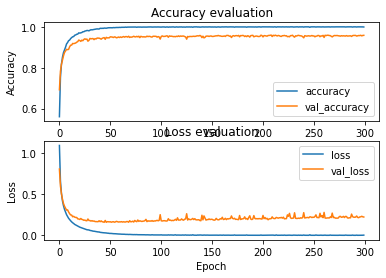

In [8]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history["accuracy"], label="accuracy")
axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# create loss subplot
axs[1].plot(history.history["loss"], label="loss")
axs[1].plot(history.history['val_loss'], label="val_loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()

In [9]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9607

Test loss: 0.18753582239151, test accuracy: 96.0700273513794
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

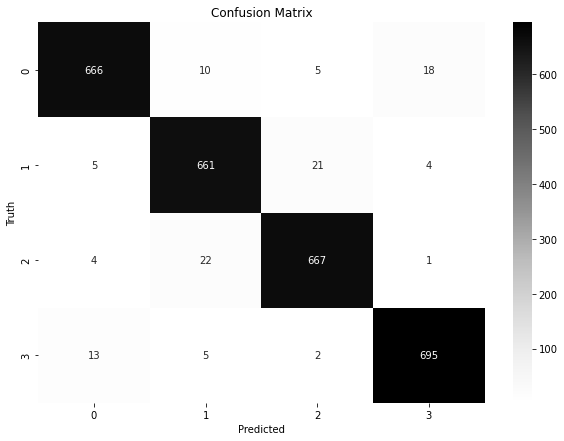

In [10]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

## LSTM 

In [20]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=input_shape))

model.add(tf.keras.layers.Reshape((1, X_train.shape[1]*X_train.shape[2])))

# LSTM layer
model.add(tf.keras.layers.LSTM(512))

#dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 572)               0         
_________________________________________________________________
reshape_4 (Reshape)          (None, 1, 572)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 512)               2222080   
_________________________________________________________________
dense_16 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_17 (Dense)             (None, 4)                 1028      
Total params: 2,354,436
Trainable params: 2,354,436
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300
88/88 [==============================] - 0s 2ms/step - loss: 1.1825 - accuracy: 0.5591
Epoch 2/300
88/88 [==============================] - 0s 3ms/step - loss: 0.9972 - accuracy: 0.6652
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.8525 - accuracy: 0.7088
Epoch 4/300
88/88 [==============================] - 0s 3ms/step - loss: 0.7528 - accuracy: 0.7438
Epoch 5/300
88/88 [==============================] - 0s 2ms/step - loss: 0.6747 - accuracy: 0.7671
Epoch 6/300
88/88 [==============================] - 0s 3ms/step - loss: 0.6178 - accuracy: 0.7835
Epoch 7/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5726 - accuracy: 0.7985
Epoch 8/300
88/88 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.8099
Epoch 9/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5038 - accuracy: 0.8242
Epoch 10/300
88/88 [==============================] - 0s 3ms/step - loss: 0.4727 - accuracy: 0.8332
Epoch 11/

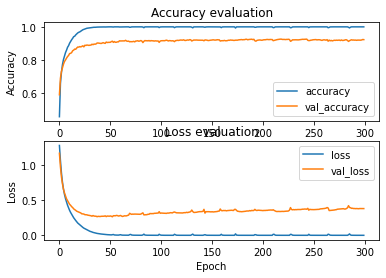

In [23]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history["accuracy"], label="accuracy")
axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# create loss subplot
axs[1].plot(history.history["loss"], label="loss")
axs[1].plot(history.history['val_loss'], label="val_loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()

In [24]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 3ms/step - loss: 0.3515 - accuracy: 0.9182

Test loss: 0.3515150845050812, test accuracy: 91.81850552558899
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

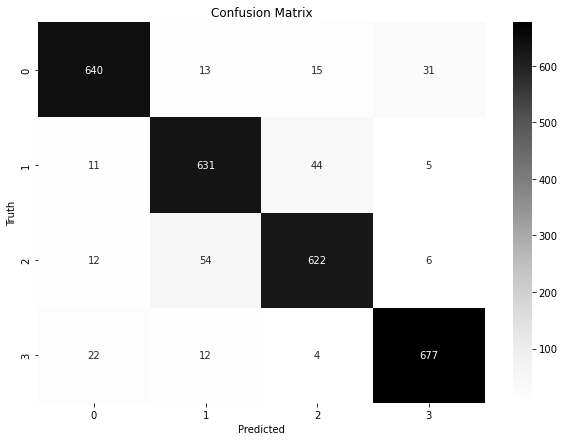

In [25]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

## ANN

In [26]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001


model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=input_shape))

# 1st dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

# 2nd dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.3)

# 3rd dense layer
model.add(tf.keras.layers.Dense(64, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 572)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 256)               146688    
_________________________________________________________________
dense_19 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 4)                 260       
Total params: 188,100
Trainable params: 188,100
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

Epoch 1/300
88/88 [==============================] - 0s 2ms/step - loss: 6.8556 - accuracy: 0.4987
Epoch 2/300
88/88 [==============================] - 0s 2ms/step - loss: 4.6353 - accuracy: 0.5795
Epoch 3/300
88/88 [==============================] - 0s 2ms/step - loss: 3.6292 - accuracy: 0.6295
Epoch 4/300
88/88 [==============================] - 0s 2ms/step - loss: 3.0703 - accuracy: 0.6610
Epoch 5/300
88/88 [==============================] - 0s 2ms/step - loss: 2.6665 - accuracy: 0.6888
Epoch 6/300
88/88 [==============================] - 0s 2ms/step - loss: 2.3409 - accuracy: 0.7056
Epoch 7/300
88/88 [==============================] - 0s 2ms/step - loss: 2.1447 - accuracy: 0.7256
Epoch 8/300
88/88 [==============================] - 0s 2ms/step - loss: 1.9975 - accuracy: 0.7435
Epoch 9/300
88/88 [==============================] - 0s 2ms/step - loss: 1.8761 - accuracy: 0.7506
Epoch 10/300
88/88 [==============================] - 0s 2ms/step - loss: 1.7004 - accuracy: 0.7656
Epoch 11/

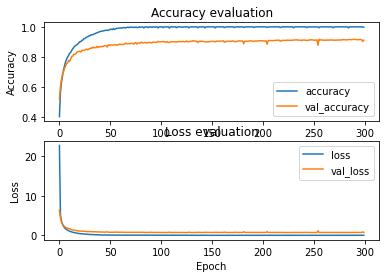

In [28]:
fig, axs = plt.subplots(2)

# create accuracy subplot
axs[0].plot(history.history["accuracy"], label="accuracy")
axs[0].plot(history.history['val_accuracy'], label="val_accuracy")
axs[0].set_ylabel("Accuracy")
axs[0].legend(loc="lower right")
axs[0].set_title("Accuracy evaluation")

# create loss subplot
axs[1].plot(history.history["loss"], label="loss")
axs[1].plot(history.history['val_loss'], label="val_loss")
axs[1].set_xlabel("Epoch")
axs[1].set_ylabel("Loss")
axs[1].legend(loc="upper right")
axs[1].set_title("Loss evaluation")

plt.show()

In [29]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.9103

Test loss: 0.7418597340583801, test accuracy: 91.03251099586487
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

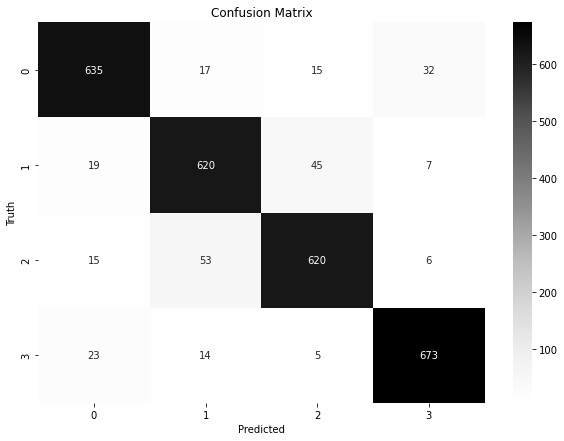

In [30]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [10]:
input_shape = (X_train.shape[1], X_train.shape[2], 1)
loss="sparse_categorical_crossentropy"
LEARNING_RATE = 0.00001

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((input_shape[0], input_shape[1]), input_shape=input_shape))
model.add(tf.keras.layers.GRU(128, return_sequences=True))
model.add(tf.keras.layers.GRU(64))

# 1st dense layer
model.add(tf.keras.layers.Dense(256, activation='relu'))
tf.keras.layers.Dropout(0.3)

# 2nd dense layer
model.add(tf.keras.layers.Dense(128, activation='relu'))
tf.keras.layers.Dropout(0.3)

# softmax output layer
model.add(tf.keras.layers.Dense(4, activation='softmax'))
optimiser = tf.optimizers.Adam(learning_rate=LEARNING_RATE)

# compile model
model.compile(optimizer=optimiser,
              loss=loss,
              metrics=["accuracy"])

# print model parameters on console
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 44, 13)            0         
_________________________________________________________________
gru_1 (GRU)                  (None, 44, 128)           54912     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                37248     
_________________________________________________________________
dense (Dense)                (None, 256)               16640     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 516       
Total params: 142,212
Trainable params: 142,212
Non-trainable params: 0
________________________________________________

In [11]:
history = model.fit(X_train,
                    y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_validation, y_validation),
                    callbacks=TestCallback(X_test, y_test))

2023-02-11 05:30:14.544440: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/300


2023-02-11 05:30:18.011037: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


88/88 [==============================] - 0s 4ms/step - loss: 1.2986 - accuracy: 0.5063
Epoch 2/300
88/88 [==============================] - 0s 3ms/step - loss: 1.1379 - accuracy: 0.5849
Epoch 3/300
88/88 [==============================] - 0s 3ms/step - loss: 0.9391 - accuracy: 0.6399
Epoch 4/300
88/88 [==============================] - 0s 3ms/step - loss: 0.7960 - accuracy: 0.6838
Epoch 5/300
88/88 [==============================] - 0s 3ms/step - loss: 0.7111 - accuracy: 0.7242
Epoch 6/300
88/88 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.7488
Epoch 7/300
88/88 [==============================] - 0s 3ms/step - loss: 0.6149 - accuracy: 0.7656
Epoch 8/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5823 - accuracy: 0.7803
Epoch 9/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5592 - accuracy: 0.7914
Epoch 10/300
88/88 [==============================] - 0s 3ms/step - loss: 0.5272 - accuracy: 0.7974
Epoch 11/300
88/88 [=

In [14]:
# evaluate network on test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print("\nTest loss: {}, test accuracy: {}".format(test_loss, 100*test_acc))

print(input_shape)
# save model
# model.save(SAVED_MODEL_PATH)

88/88 [==============================] - 0s 3ms/step - loss: 0.5784 - accuracy: 0.9500

Test loss: 0.5784111618995667, test accuracy: 94.99821066856384
(44, 13, 1)


Text(69.0, 0.5, 'Truth')

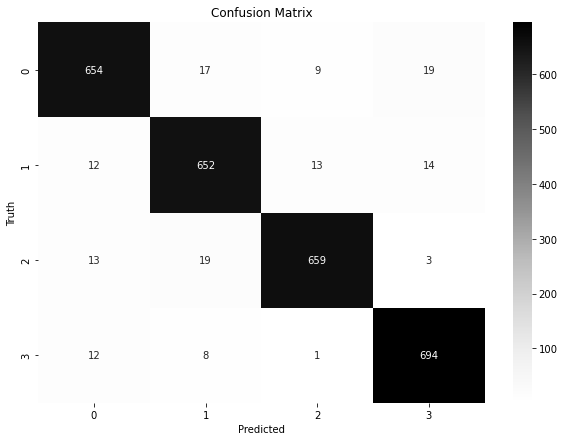

In [15]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, cmap='Greys', annot=True, fmt='d')
plt.title('Confusion Matrix') 
plt.xlabel('Predicted')
plt.ylabel('Truth')